#Proyecto Final
##Consigna
i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.

##Índice
1. Hipótesis
2. Importación de Librerías
3. Carga de Datos
4. Análisis Exploratorio de Datos (EDA) Básico
5. Feature Selection
6. Matriz de Confusión y Curva ROC

##1. Hipótesis y Objetivos
**Hipótesis:**
1. Que el paciente esté embarazada **no es suficiente** para predecir si tiene o no diabetes. Es decir: usando solo la variable `Pregnancies` no alcanzamos una performance predictiva mejor que el azar.
2. Es posible construir un modelo que prediga la presencia de diabetes con una precisión superior al 50% (azar).

**Objetivo:** Construir y evaluar un modelo de clasificación que prediga si un paciente tiene diabetes (Outcome = 1) o no (Outcome = 0).


##2. Importación de Librerías

In [95]:
#Librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve)
print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


##3. Carga de Datos

**Dataset**: Pima Indians Diabetes Database https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [96]:
#Importar el dataframe desde local y verificar las primeras filas
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
#Información del dataframe
row, col = df.shape
print("Este dataframe tiene",row,"filas, y",col,"columnas.")

print('\n')
print('\nTIPO DE COLUMNAS:')
print(df.dtypes)

print('\n')
print('\nRESUMEN ESTADÍSTICO:')
display(df.describe())

Este dataframe tiene 768 filas, y 9 columnas.



TIPO DE COLUMNAS:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object



RESUMEN ESTADÍSTICO:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##4. Análisis Exploratorio de Datos (EDA) Básico

In [98]:
#Cambio de encabezado a "lowecase"
df.columns = df.columns.str.lower()
print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [99]:
#Reemplazo de valores "0"
col_con_ceros = ['glucose','bloodpressure','skinthickness','insulin','bmi']
df[col_con_ceros] = df[col_con_ceros].replace(0, np.nan)

df.fillna(df.median(), inplace=True)

print('Cantidad de valores faltantes por columna después de reemplazar ceros:')
print(df.isnull().sum())

Cantidad de valores faltantes por columna después de reemplazar ceros:
pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


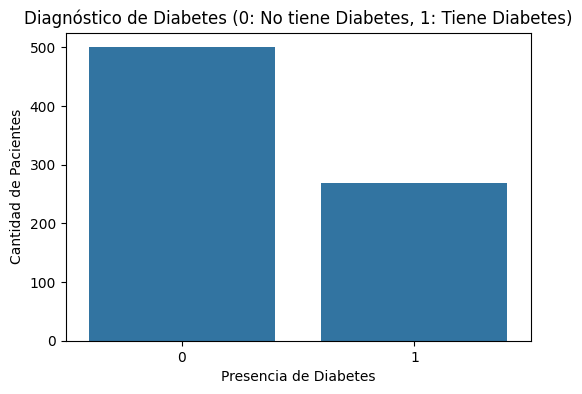

In [100]:
plt.figure(figsize=(6, 4))
sns.countplot(x='outcome', data=df)
plt.title('Diagnóstico de Diabetes (0: No tiene Diabetes, 1: Tiene Diabetes)')
plt.xlabel('Presencia de Diabetes')
plt.ylabel('Cantidad de Pacientes')
target_dist = df['outcome'].value_counts(normalize=True) * 100

plt.show()

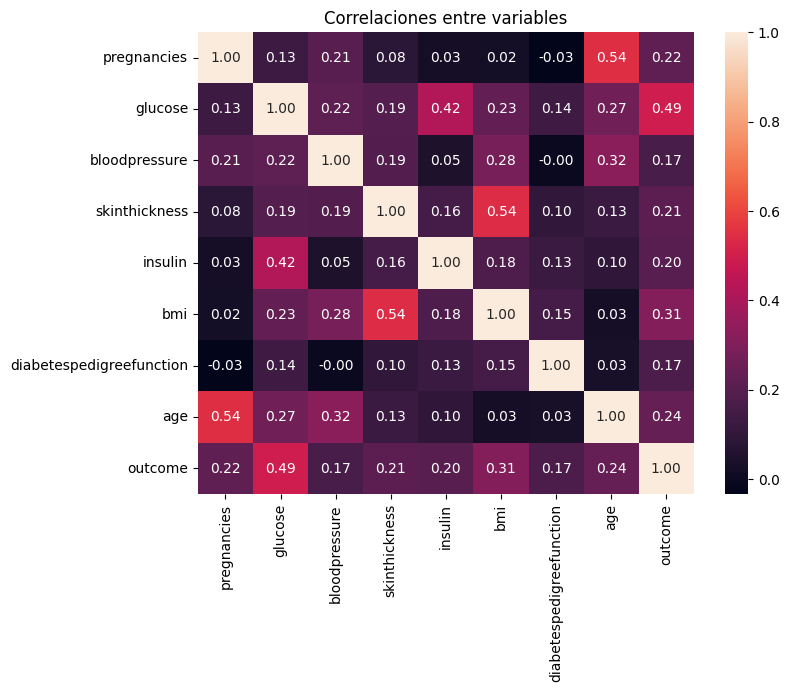

In [101]:
# Mapa de correlación
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlaciones entre variables')
plt.show()

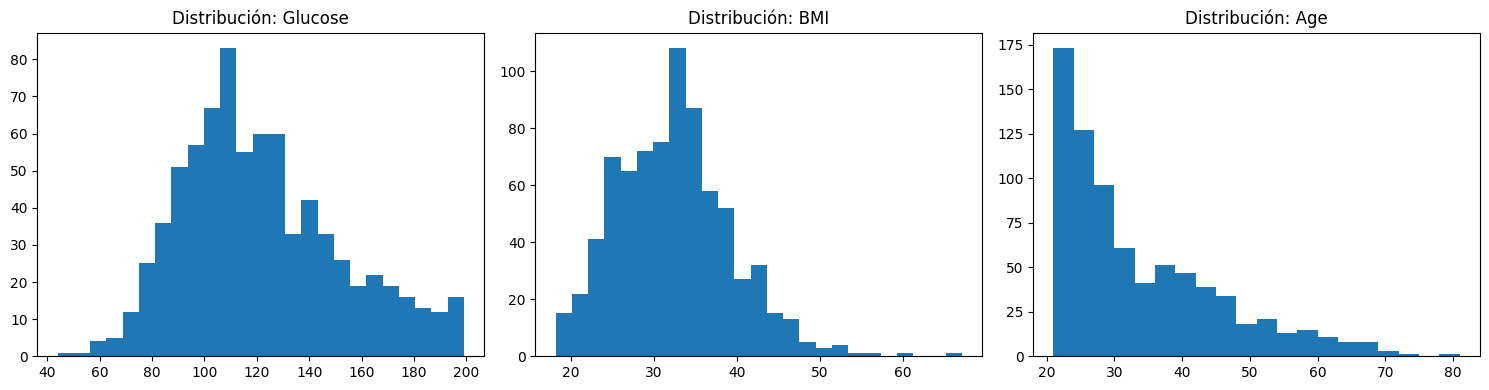

In [102]:
# 6.b) Distribuciones: Glucose, BMI, Age
fig, axes = plt.subplots(1,3, figsize=(15,4))
axes[0].hist(df['glucose'], bins=25)
axes[0].set_title('Distribución: Glucose')
axes[1].hist(df['bmi'], bins=25)
axes[1].set_title('Distribución: BMI')
axes[2].hist(df['age'], bins=20)
axes[2].set_title('Distribución: Age')
plt.tight_layout()
plt.show()

##5. Feature Selection
Dividimos el dataset en train (70%) y test (30%), manteniendo la proporción de clases.

In [103]:
# Definir X e y
X = df.drop('outcome', axis=1)
y = df['outcome']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('TAMAÑOS: \nX_train:', X_train.shape, '\nX_test:', X_test.shape)

TAMAÑOS: 
X_train: (537, 8) 
X_test: (231, 8)


In [104]:
#Método elegido: SelectKBest con mutual_info_classif
k_values = list(range(3, X_train.shape[1]+1))
cv_scores = []

for k in k_values:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_sel_tmp = selector.fit_transform(X_train, y_train)
    rf_tmp = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(rf_tmp, X_train_sel_tmp, y_train, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())

results = pd.DataFrame({'k': k_values, 'cv_roc_auc': cv_scores})
display(results.sort_values(by='cv_roc_auc', ascending=False).head(10))

best_k = int(results.sort_values(by='cv_roc_auc', ascending=False).iloc[0]['k'])
print(f'k óptimo según CV (roc_auc): {best_k}')

,k,cv_roc_auc
3,6,0.826117
2,5,0.809280
5,8,0.805087
4,7,0.799245
0,3,0.798334
1,4,0.797556


k óptimo según CV (roc_auc): 6


In [105]:
selector_final = SelectKBest(score_func=mutual_info_classif, k=best_k)
X_train_sel = selector_final.fit_transform(X_train, y_train)
X_test_sel = selector_final.transform(X_test)

selected_features = X_train.columns[selector_final.get_support()].tolist()
print('Características seleccionadas:', selected_features)

Características seleccionadas: ['pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'age']


In [106]:
# Entrenar RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_sel, y_train)

# Predicción
y_pred = rf.predict(X_test_sel)
y_proba = rf.predict_proba(X_test_sel)[:,1]

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print('MÉTRICAS:')
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC AUC: {auc:.3f}')

print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred, digits=3))

MÉTRICAS:
Accuracy: 0.771
Precision: 0.694
Recall: 0.617
F1-score: 0.654
ROC AUC: 0.823

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.805     0.853     0.828       150
           1      0.694     0.617     0.654        81

    accuracy                          0.771       231
   macro avg      0.750     0.735     0.741       231
weighted avg      0.766     0.771     0.767       231



##6. Matriz de Confusión y Curva ROC

Matriz de confusión:


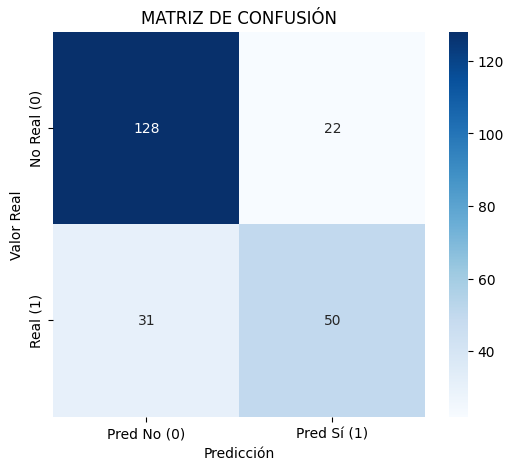

In [107]:
#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['No Real (0)', 'Real (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('MATRIZ DE CONFUSIÓN')
plt.show()

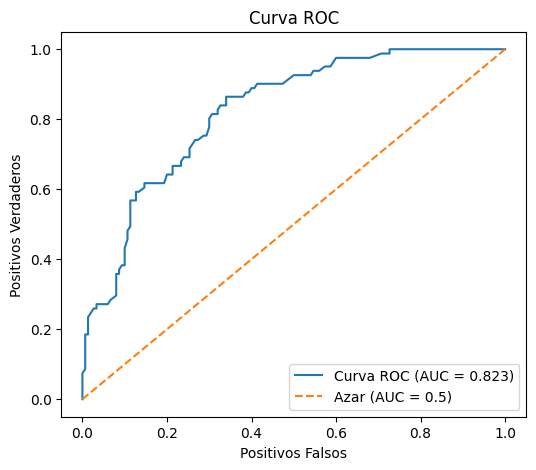

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.3f})')
plt.plot([0,1],[0,1], linestyle='--', label='Azar (AUC = 0.5)')
plt.xlabel('Positivos Falsos')
plt.ylabel('Positivos Verdaderos')
plt.title('Curva ROC')
plt.legend()
plt.show()

##7. Conclusiones

In [116]:
y_pred = rf.predict(X_test_sel)
y_prob = rf.predict_proba(X_test_sel)[:, 1]

# Métricas
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.62      0.65        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [118]:
# Resumen interpretado de resultados
print("\nResumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).")
print(f"Obtuvimos una Accuracy de {accuracy:.2f} y un AUC de {roc_auc:.2f}.\n")

# Evaluación de hipótesis H0 y H1
if accuracy > 0.75 and roc_auc > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.")
    print("El modelo supera el umbral de precisión y es significativamente mejor que el azar.")
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada.")
    print("Aunque el AUC indica un rendimiento mejor que el azar, la precisión podría no haber alcanzado el umbral deseado del 75% (o viceversa).")
    print("Se necesita revisar el modelo o los datos.")



Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.7706
- AUC del modelo en el conjunto de prueba: 0.8229
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).
Obtuvimos una Accuracy de 0.77 y un AUC de 0.82.

RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.
El modelo supera el umbral de precisión y es significativamente mejor que el azar.
Rechazamos la hipótesis nula (H0).
